## Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load Dataset

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Year_Of_Experience,Gender,Salary
0,0.0,Male,0
1,0.0,Female,0
2,0.5,Male,10000
3,0.8,Female,14000
4,1.0,Female,20000


## Step 3 : General Information Of Dataset

In [3]:
# Information of type of object, column names, data type of each column, index information,
# memory usage and non-null count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Of_Experience  14 non-null     float64
 1   Gender              13 non-null     object 
 2   Salary              14 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes


In [4]:
# Less Information
dataset.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 3 entries, Year_Of_Experience to Salary
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes


## Step 4 : Check Data Type Of Features and Change If Required

In [5]:
# Data types of each column
print(dataset.dtypes)

Year_Of_Experience    float64
Gender                 object
Salary                  int64
dtype: object


In [6]:
# Change object datatype into category if number 
# of categories are less than 5 percent of the total number of values
cols = dataset.select_dtypes(include='object').columns

for col in cols:
    ratio = len(dataset[col].value_counts()) / len(dataset)
    if ratio < 0.05:
        dataset.loc[:, col] = dataset.loc[:, col].astype('category')

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Of_Experience  14 non-null     float64
 1   Gender              13 non-null     object 
 2   Salary              14 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# Change datatype if you think 
dataset.Gender = dataset.Gender.astype('category')
dataset.dtypes

Year_Of_Experience     float64
Gender                category
Salary                   int64
dtype: object

## Step 5 : Missing Data Management

In [8]:
#Check missing percentage of each column
NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN


,column_name,percentage
0,Year_Of_Experience,0.000000
1,Gender,7.142857
2,Salary,0.000000


In [9]:
## Columns that has 30 or more than 30 percent missing values
# will be drop from dataset.
threshold = len(dataset) * 0.7
dataset = dataset.dropna(axis = 1, thresh = threshold)

NAN = [(clm_name, dataset[clm_name].isna().mean()*100) for clm_name in dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,Year_Of_Experience,0.000000
1,Gender,7.142857
2,Salary,0.000000


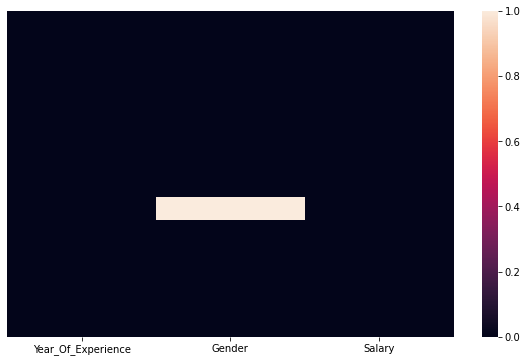

In [10]:
# Missing data visualization
plt.figure(figsize = (10, 6))
sns.heatmap(dataset.isna(), 
        cbar = 'viridis',
        yticklabels = False)
plt.show()
plt.close()

In [11]:
# Handle missing values
dataset.Gender = dataset['Gender'].fillna(dataset.Gender.mode()[0])
dataset.isna().sum()

Year_Of_Experience    0
Gender                0
Salary                0
dtype: int64

## Step 6 : Find and Deal With Duplicate Data

In [12]:
# Total count of duplicate rows
dataset.duplicated().sum()

1

In [13]:
# Drop rows which are duplicate
dataset.drop_duplicates(inplace = True)
dataset.duplicated().sum()

0

## Step 7 : Find Outliers and Deal

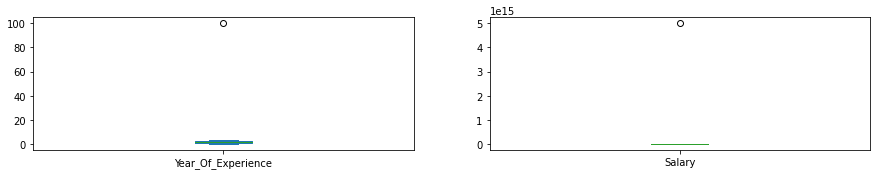

In [14]:
# Using Box Plot
dataset.plot(kind = 'box',
                subplots = True,
                layout = (7, 2),
                figsize = (15, 20))

plt.show()
plt.close()

In [15]:
# Check and Set Range
low = np.quantile(dataset.Salary, 0.05)
high = np.quantile(dataset.Salary, 0.95)
dataset = dataset[dataset.Salary.between(low, high)]
dataset

,Year_Of_Experience,Gender,Salary
0,0.0,Male,0
1,0.0,Female,0
2,0.5,Male,10000
3,0.8,Female,14000
4,1.0,Female,20000
6,2.0,Male,40000
7,1.5,Male,28000
8,2.0,Male,45000
9,2.5,Male,55000
10,0.3,Male,10000


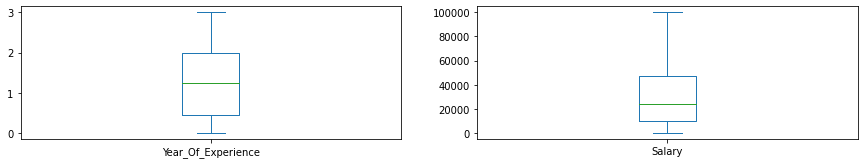

In [16]:
# Using Box Plot
dataset.plot(kind = 'box',
                subplots = True,
                layout = (7, 2),
                figsize = (15, 20))

plt.show()
plt.close()

## Step 8 : Check Imbalance dataset

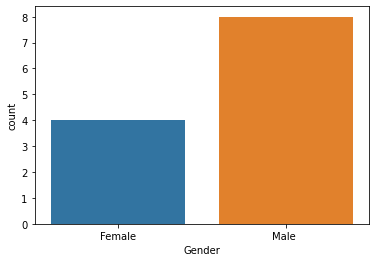

In [18]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(dataset.Gender)
plt.show()
plt.close()

In [19]:
## For getting ratio of classes
# 
from sklearn.utils import compute_class_weight

## 
#
class_weight = compute_class_weight('balanced', 
                    dataset['Gender'].unique() , 
                    dataset['Gender'])

## Get in ratio
#
print("Classes : {}".format(dataset['Gender'].unique()))
print("Ratio : {}".format(class_weight))

Classes : ['Male ', 'Female']
Categories (2, object): ['Female', 'Male ']
Ratio : [0.75 1.5 ]


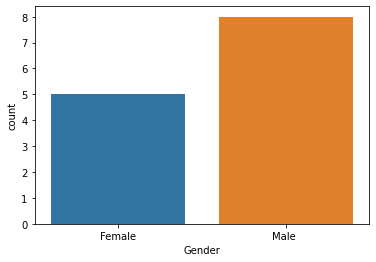

In [20]:
# Handle Imbalanced
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority')


X, Y = over_sampler.fit_resample(dataset[['Year_Of_Experience', 'Gender']], 
                            dataset[['Salary']])
dataset = pd.concat([X, Y], axis=1)
sns.countplot(pd.concat([X, Y], axis=1).Gender)
plt.show()
plt.close()


## Step 9 : Statistical Information

In [21]:
# Information like count, mean, std, min, 25%, 50%, 75% and max
dataset.describe()

,Year_Of_Experience,Salary
count,13.000000,13.000000
mean,1.261538,30461.538462
std,0.975994,28814.392771
min,0.000000,0.000000
25%,0.500000,10000.000000
50%,1.000000,20000.000000
75%,2.000000,45000.000000
max,3.000000,100000.000000


In [22]:
# To get statistical information of string column 
dataset.describe(include = 'all')

,Year_Of_Experience,Gender,Salary
count,13.000000,13,13.000000
unique,NaN,2,NaN
top,NaN,Male,NaN
freq,NaN,8,NaN
mean,1.261538,NaN,30461.538462
std,0.975994,NaN,28814.392771
min,0.000000,NaN,0.000000
25%,0.500000,NaN,10000.000000
50%,1.000000,NaN,20000.000000
75%,2.000000,NaN,45000.000000


## Step 10 : Heatmap to check correlation

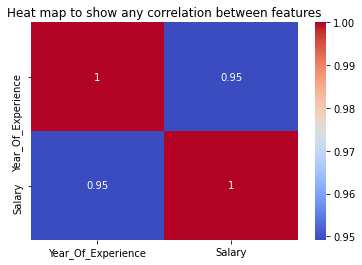

In [23]:
# Using heatmap
features = dataset.columns.to_list()
sns.heatmap(dataset[features].corr(), 
                cmap = 'coolwarm',
                annot = True)

plt.title("Heat map to show any correlation between features")
plt.xlabel("")
plt.ylabel("")
plt.show()
plt.close()

## Step 11 : Summarization and filter dataset

In [24]:
# Value count
dataset.Gender.value_counts()

Male      8
Female    5
Name: Gender, dtype: int64

In [25]:
# Filter
condition = dataset.Salary > 30000
dataset[condition]

,Year_Of_Experience,Gender,Salary
5,2.0,Male,40000
7,2.0,Male,45000
8,2.5,Male,55000
10,2.0,Male,60000
11,3.0,Female,100000


In [26]:
# Filter
condition = dataset.Year_Of_Experience.between(3, 10)
dataset[condition]

,Year_Of_Experience,Gender,Salary
11,3.0,Female,100000


In [27]:
# Sorting
dataset.sort_values(by = "Salary")

,Year_Of_Experience,Gender,Salary
0,0.0,Male,0
1,0.0,Female,0
2,0.5,Male,10000
9,0.3,Male,10000
3,0.8,Female,14000
12,0.8,Female,14000
4,1.0,Female,20000
6,1.5,Male,28000
5,2.0,Male,40000
7,2.0,Male,45000


## Step 12 : Measure of Central Dependency

In [130]:
# Mean, Median and Mode
from scipy import stats

np.mean(dataset.Salary)
np.median(dataset.Salary)
stats.mode(dataset.Gender)[0]

array(['Male '], dtype=object)

## Step 13 : Measure of dispersion

In [132]:
# Variance and Standard Deviation
np.var(dataset.Salary)
# Variance is large - Data points are spread-out.

np.std(dataset.Salary)
# Standard deviation is large - Data are widely dispersed.

27683.97310473887

## Step 14 : Measure of position

In [28]:
# Percentile
percen = np.percentile(a = dataset.Salary, q = 10)
print("10th Percentile is at : {}".format(percen))

10th Percentile is at : 2000.0000000000018


In [29]:
# Quartile
quar = np.percentile(dataset.Salary, 25, interpolation = 'midpoint')   # 1st quartile
print("1st quartile : {}".format(quar))

1st quartile : 10000.0


## Step 15 : Moments

In [133]:
# Skewness
from scipy.stats import skew

skew(dataset.Salary)
# Skewness by value → Skewness value > 0

1.076794748155026

In [134]:
# Kurtosis
from scipy.stats import kurtosis

kurtosis(dataset.Salary)
# Platykurtic → Kurtosis > 0 

0.5086220300532016

## Step 16 : Problem statement